## ANALISIS EXPLORATORIO DE DATOS

Se lleva a cabo un EDA con el objetivo de identificar patrones que faciliten la generación de información para respaldar la toma de decisiones orientadas a reducir el número de víctimas fatales.

Para mejorar la organización durante la lectura, se han encapsulado los códigos relacionados con gráficos y otros datos en funciones dentro de la libreria denominada "functions", la cual está adjunta en este repositorio.

In [384]:
#Importamos las librerias que vamos a usar en el proyecto
import numpy as np
import pandas as pd
#Permite recargar automaticamente los modulos antes de ejecutar el codigo
%load_ext autoreload
#recarga todos los modulos de forma automatica cada vez que se ejecuta la celda
%autoreload 2
import functions
import warnings
#suprime las advertencias
warnings.filterwarnings("ignore")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [385]:
#Se usa para poder observar el dataframe completo
pd.options.display.max_columns= None

## ABRIMOS LA BASE DE DATOS QUE ESTA EN FORMATO EXCEL

Abrimos la base de datos de homicidios y extraemos los libros de Hechos y victimas, y creamos 2 Dataframes con ellos. 
Para tener una mejor visualizacion de los datos Usamos la funcion de pandas .head() que por defecto nos deja visualizar las 5 primeras filas con sus columna del Dataframe

In [386]:
df_hechos=pd.read_excel('C:/Users/Elena/Desktop/PYTHON/PROYECTO 2/homicidios.xlsx' , sheet_name='HECHOS')



In [387]:
df_hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [388]:
print(df_hechos.shape)

(696, 21)


In [389]:
#columnas de dataset
df_hechos.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

Como podemos observar el nuevo Dataset contine 696 filas y 21 columnas, las cuales tienen una mezcla entre mayusculas y minusculas, lo cual nos puede llevar a tener problemas mas adelante, para evitar esto vamos a estandarizar los nombres (primera letra en mayuscula el resto en minuscula)de las columnas.
Las columnas que ya tienen el fotmato requerido se dejan como estan.

In [390]:
# Se coloca la primera en mayúscula
df_hechos.columns = [x.capitalize() for x in df_hechos.columns]
# Se reemplazan los guiones por espacios
df_hechos.columns = df_hechos.columns.str.replace('_', ' ')
# Se renombran algunas columnas
df_hechos = df_hechos.rename(columns={'N victimas': 'Cantidad víctimas',
                                                      'Aaaa':'Año',
                                                      'Mm':'Mes',
                                                      'Dd':'Día',
                                                      'Hh':'Hora entera',
                                                      'Xy (caba)':'XY (CABA)',
                                                      'Victima': 'Víctima'})
df_hechos.columns

Index(['Id', 'Cantidad víctimas', 'Fecha', 'Año', 'Mes', 'Día', 'Hora',
       'Hora entera', 'Lugar del hecho', 'Tipo de calle', 'Calle', 'Altura',
       'Cruce', 'Dirección normalizada', 'Comuna', 'XY (CABA)', 'Pos x',
       'Pos y', 'Participantes', 'Víctima', 'Acusado'],
      dtype='object')

## MANEJO DE DATOS NULOS 


In [391]:
#cantidad de valores nulos por columna
print(df_hechos.isnull().sum())

Id                         0
Cantidad víctimas          0
Fecha                      0
Año                        0
Mes                        0
Día                        0
Hora                       0
Hora entera                0
Lugar del hecho            0
Tipo de calle              0
Calle                      1
Altura                   567
Cruce                    171
Dirección normalizada      8
Comuna                     0
XY (CABA)                  0
Pos x                      0
Pos y                      0
Participantes              0
Víctima                    0
Acusado                    0
dtype: int64


In [392]:
#Total de valores nulos en el dataset
print(df_hechos.isnull().sum().sum())

747


In [393]:
#Cantidad de datos en el dataset
df_hechos.size

14616

In [394]:
#porcentaje valores nulos
porcentaje_nulos= (df_hechos.isnull().sum().sum()*100)/df_hechos.size
porcentaje_nulos

5.110837438423645

Podemos observar que en total existen 747 valores nulos, los cuales representan el 5.11% de la totalid de los datos, y estos se encuentras en las columnas de "Calle", "Altura", "Cruce" y "Direccion normalizada" 
Oservamos que en la columna "Altura" se encuentras 567 datos nulos de 696 datos totales, es decir el 81.5% de los datos totales de dicha columna, ademas corroboramos que esta informacion se encuentra incluida de igual manera en la columna de "Direccion normalizada" por lo que toma la decision de borrar dicha columna de la base de datos, ya que no es relevante para el analisis.

In [395]:
# Se elimina la columna
df_hechos =df_hechos.drop('Altura', axis=1)
df_hechos.columns

Index(['Id', 'Cantidad víctimas', 'Fecha', 'Año', 'Mes', 'Día', 'Hora',
       'Hora entera', 'Lugar del hecho', 'Tipo de calle', 'Calle', 'Cruce',
       'Dirección normalizada', 'Comuna', 'XY (CABA)', 'Pos x', 'Pos y',
       'Participantes', 'Víctima', 'Acusado'],
      dtype='object')

In [396]:
#Valores unicos en la columna "Cruce"
df_hechos['Cruce'].nunique()

317

Haciendo un analisis de la columna "cruce" la cual es categorica de tipo str observamos que tiene 317 valores unicos y 24.6% de valores faltantes ademas podemos ver que tiene una relacion con las columnas "Lugar del hecho" y "Tipo de calle", ya que esta cuando no tiene valores nos indica que el accidente no ocurrio en un cruce. Con esta informacion usaremos la columna "Cruce" para verificar si el accidente fue en una esquina o en algun punto de la cuadra.

In [397]:
# Se ven los valores nulos de cruce en relación con 'Lugar del hecho' y 'Tipo de calle'
df_hechos[df_hechos['Cruce'].isnull()][['Cruce', 'Lugar del hecho', 'Tipo de calle']][ :5]


,Cruce,Lugar del hecho,Tipo de calle
2,NaN,AV ENTRE RIOS 2034,AVENIDA
9,NaN,AV ENTRE RIOS 1366,AVENIDA
14,NaN,SUIPACHA 156,CALLE
33,NaN,LIMA 1483,CALLE
35,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA


In [398]:
# Se ven los valores NO nulos de cruce en relación con 'lugar del hecho' y 'Tipo de calle'
df_hechos[df_hechos['Cruce'].notnull()][['Cruce', 'Lugar del hecho', 'Tipo de calle']][ :5]

,Cruce,Lugar del hecho,Tipo de calle
0,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA
1,DE LOS CORRALES AV.,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ
3,"VILLEGAS, CONRADO, GRAL.",AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA
4,"SAENZ PE?A, LUIS, PRES.",AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA
5,ESCALADA AV.,AV 27 DE FEBRERO Y AV ESCALADA,AVENIDA


observamos que efectivamente cuando no hay informacion del Cruce es por que el accidente no ocurrio en una esquina, sino en algun punto de la via, para facilitar el analisis y saber si fue o no fue en un cruce modificaremos la informacion de la columna "Cruce" por "no" cuando no tengamos datos y por "si" cuando tengamos datos, para facilitar el analisis, ya que esta informacion tambien esta contenida en la columna "lugar del hecho"

In [399]:
# Se reemplazan los valores no nulos por "no" y los nulos por "si"
df_hechos['Cruce'] = np.where(df_hechos['Cruce'].notnull(), 'SI', 'NO')
# Se revia la columna
df_hechos[['Cruce', 'Lugar del hecho', 'Tipo de calle']]

,Cruce,Lugar del hecho,Tipo de calle
0,SI,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA
1,SI,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ
2,NO,AV ENTRE RIOS 2034,AVENIDA
3,SI,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA
4,SI,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA
...,...,...,...
691,SI,AV. RIESTRA Y MOM,AVENIDA
692,SI,AU DELLEPIANE Y LACARRA,AUTOPISTA
693,SI,AV. GAONA Y TERRADA,AVENIDA
694,NO,AV. EVA PERON 4071,AVENIDA


Verificamos los valores nulos de la coluna "Dirección normalizada"

In [400]:
df_hechos[df_hechos['Dirección normalizada'].isnull()][['Dirección normalizada', 'Lugar del hecho', 'Tipo de calle']]

,Dirección normalizada,Lugar del hecho,Tipo de calle
38,NaN,AUTOPISTA LUGONES PK 10000,AUTOPISTA
106,NaN,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA
119,NaN,SD,CALLE
180,NaN,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA
181,NaN,AU DELLEPIANE 2400,AUTOPISTA
313,NaN,AUTOPISTA LUGONES KM 4.7,AUTOPISTA
546,NaN,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA
621,NaN,"AU BUENOS AIRES LA PLATA KM 4,5",AUTOPISTA


Como no tenemos suficiente informacion sobre estos datos para poder modificarlos, decidimos seguir con la codificacion original del dataset y por facilidad del majeo de los datos cambianos los valores nulos por el indicativo SD (Sin Dato)

In [401]:
#Rellenamos los nulos con SD
df_hechos['Dirección normalizada'].fillna('SD', inplace=True)

#Verificamos que se haya realizado el cambio
df_hechos[df_hechos['Dirección normalizada']== 'SD'][['Dirección normalizada', 'Lugar del hecho', 'Tipo de calle']]

,Dirección normalizada,Lugar del hecho,Tipo de calle
38,SD,AUTOPISTA LUGONES PK 10000,AUTOPISTA
106,SD,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA
119,SD,SD,CALLE
180,SD,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA
181,SD,AU DELLEPIANE 2400,AUTOPISTA
313,SD,AUTOPISTA LUGONES KM 4.7,AUTOPISTA
546,SD,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA
621,SD,"AU BUENOS AIRES LA PLATA KM 4,5",AUTOPISTA


Vericamos la columna calle

In [402]:
df_hechos[df_hechos['Calle'].isnull()][['Calle', 'Lugar del hecho', 'Tipo de calle']][ :5]

,Calle,Lugar del hecho,Tipo de calle
119,NaN,SD,CALLE


como calle solo tiene 1 dato faltante y para seguir con las codificacion original de dataset, reemplazamos el valor nulo por SD

In [403]:
#Rellenamos los nulos con SD
df_hechos['Calle'].fillna('SD', inplace=True)

#Verificamos que se haya realizado el cambio
df_hechos[df_hechos['Calle']== 'SD'][['Calle', 'Lugar del hecho', 'Tipo de calle']]

,Calle,Lugar del hecho,Tipo de calle
119,SD,SD,CALLE


## MANEJO DE DATOS DUPLICADOS





In [404]:
# verificamos si hay datos duplicados
print(f"La columna 'Id' cuenta con {len(df_hechos['Id'].unique())} valores únicos.")

La columna 'Id' cuenta con 696 valores únicos.


Observamos que el Dataset no tiene filas duplicadas

Tipos de Datos en las columnas

In [405]:
#Vemos el tipo de dato en cada columna.

functions.verificar_tipo_variable(df_hechos)

,nombre_campo,tipo_datos
0,Id,[<class 'str'>]
1,Cantidad víctimas,[<class 'int'>]
2,Fecha,[<class 'pandas._libs.tslibs.timestamps.Timest...
3,Año,[<class 'int'>]
4,Mes,[<class 'int'>]
5,Día,[<class 'int'>]
6,Hora,"[<class 'datetime.time'>, <class 'str'>, <clas..."
7,Hora entera,"[<class 'int'>, <class 'str'>]"
8,Lugar del hecho,[<class 'str'>]
9,Tipo de calle,[<class 'str'>]


Se puede observar que las columnas " Hora" y "Hora entera" tienen varios tipos de datos, hacemos un analisis individual a esas dos columnas para determinar cual es la mejor manera de proceder con los tipos de datos de dichas columnas

In [406]:
# Cantidad de valores por tipo de dato en la columna 'hora'
df_hechos['Hora'].apply(type).value_counts()

Hora
<class 'datetime.time'>        608
<class 'str'>                   85
<class 'datetime.datetime'>      3
Name: count, dtype: int64

Vamos a llevar todos los datos a datetime.time con la funcion 'convertir_a_time()'

In [407]:
#Cambio de tipo de datos 
df_hechos['Hora'] = df_hechos['Hora'].apply(lambda x: functions.convertir_a_time(x))

#Verificamos que se hayan modificado los valores
df_hechos['Hora'].apply(type).value_counts()

Hora
<class 'datetime.time'>    695
<class 'NoneType'>           1
Name: count, dtype: int64

buscamos el registro que no tiene type 

In [408]:
df_hechos[df_hechos['Hora'].isna()]

,Id,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Lugar del hecho,Tipo de calle,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
518,2019-0103,1,2019-12-18,2019,12,18,None,SD,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,"PAZ, GRAL. AV.",SI,"PAZ, GRAL. AV. y GRIVEO",11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO


como observamos no tiene valor en el la columna de Hora, por ende modificamos el valor para poder continuar con el analisis, y la mejor forma de rellenar dicho campo sin modificar la columna es rellarla con el valor de la moda

In [409]:
#Calculamos la hora mas común
hora_moda = df_hechos['Hora'].mode().iloc[0]
print(f'La hora mas común es: {hora_moda}')

#Reemplazamos el valor
df_hechos['Hora'].fillna(hora_moda, inplace=True)

#verificamos el tipo de dato para toda la columna
df_hechos['Hora'].apply(type).value_counts()

La hora mas común es: 09:00:00


Hora
<class 'datetime.time'>    696
Name: count, dtype: int64

Continuamos con la columna "Hora entera", y hacemos lo mismo que hicimos con la columna "Hora"

In [410]:
#verificamos el tipo de dato para toda la columna
df_hechos['Hora entera'].apply(type).value_counts()

Hora entera
<class 'int'>    695
<class 'str'>      1
Name: count, dtype: int64

In [411]:
#Agregamos el valor de la hora moda, en el dato faltante.
df_hechos['Hora entera'] = df_hechos['Hora entera'].apply(lambda x: int(hora_moda.hour) if x== 'SD' else x)

#Verificamos que se haya modificado el tipo de dato
df_hechos['Hora entera'].apply(type).value_counts()

Hora entera
<class 'int'>    696
Name: count, dtype: int64

Verificamos los tipos de datos de las columnas despues de las modificaciones

In [412]:

functions.verificar_tipo_variable(df_hechos)

,nombre_campo,tipo_datos
0,Id,[<class 'str'>]
1,Cantidad víctimas,[<class 'int'>]
2,Fecha,[<class 'pandas._libs.tslibs.timestamps.Timest...
3,Año,[<class 'int'>]
4,Mes,[<class 'int'>]
5,Día,[<class 'int'>]
6,Hora,[<class 'datetime.time'>]
7,Hora entera,[<class 'int'>]
8,Lugar del hecho,[<class 'str'>]
9,Tipo de calle,[<class 'str'>]


## CATEGORIAS DICCIONARIO DE DATOS
Verificamos que los datos entregados en el diccionario de datos correspondan a los plasmados en las columnas del dataset

In [413]:
#Traemos los valores únicos de la columna 'Victima'

df_hechos['Víctima'].unique()

array(['MOTO', 'AUTO', 'PEATON', 'SD', 'CARGAS', 'BICICLETA', 'PASAJEROS',
       'MOVIL', 'OBJETO FIJO', 'PEATON_MOTO'], dtype=object)

In [414]:
#Traemos los valores únicos de la columna 'Acusado'

df_hechos['Acusado'].unique()

array(['AUTO', 'PASAJEROS', 'SD', 'OBJETO FIJO', 'CARGAS', 'MOTO',
       'MULTIPLE', 'OTRO', 'BICICLETA', 'TREN'], dtype=object)

Comparando los valores unicos con los del diccionario de datos en la base de datos de excel, podemos verificar que para el Acusado corresponden las categorias, pero para la Victima hay 2 categorias que no se encuentran en el diccionario, estas son "OBJETO FIJO" y "PEATON_MOTO"

In [415]:
#Buscamos los registros 

df_hechos[df_hechos['Víctima'].isin(['OBJETO FIJO', 'PEATON_MOTO'])]

,Id,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Lugar del hecho,Tipo de calle,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
230,2017-0108,2,2017-09-02,2017,9,2,04:53:08,4,AV. GRAL. PAZ Y MACHAIN,GRAL PAZ,"PAZ, GRAL. AV.",SI,"PAZ, GRAL. AV. y MACHAIN",12,Point (97098.48468623 109019.96106626),-58.49491054,-34.54795581,AUTO-OBJETO FIJO,OBJETO FIJO,AUTO
583,2020-0063,2,2020-12-05,2020,12,5,07:10:00,7,NUEVA YORK Y ALTA GRACIA,CALLE,NUEVA YORK,SI,NUEVA YORK y ALTA GRACIA,11,Point (94080.62190808 102083.62453795),-58.52783814,-34.61047001,PEATON_MOTO-MOTO,PEATON_MOTO,MOTO


se cambian los registros de "OBJETO FIJO" y "PEATON_MOTO" por "OTRO" ya que desconocemos su  origen

In [416]:
#Reemplazamos valores
df_hechos['Víctima']= df_hechos['Víctima'].replace({'OBJETO FIJO':'OTRO', 'PEATON_MOTO':'OTRO'})

#Verificamos que se haya realizado el cambio correctamente
df_hechos[df_hechos['Id'].isin(['2017-0108','2020-0063'])]

,Id,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Lugar del hecho,Tipo de calle,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
230,2017-0108,2,2017-09-02,2017,9,2,04:53:08,4,AV. GRAL. PAZ Y MACHAIN,GRAL PAZ,"PAZ, GRAL. AV.",SI,"PAZ, GRAL. AV. y MACHAIN",12,Point (97098.48468623 109019.96106626),-58.49491054,-34.54795581,AUTO-OBJETO FIJO,OTRO,AUTO
583,2020-0063,2,2020-12-05,2020,12,5,07:10:00,7,NUEVA YORK Y ALTA GRACIA,CALLE,NUEVA YORK,SI,NUEVA YORK y ALTA GRACIA,11,Point (94080.62190808 102083.62453795),-58.52783814,-34.61047001,PEATON_MOTO-MOTO,OTRO,MOTO


## VARIABLES XY(CABA) LONGITUD Y LATITUD

Anteriormente cuando revisamos el contenido del Dataset pudumos corroborar  que en la columna XY(CABA) encontramos celdas con valor (..) y en las columnas "Pos x" y "Pos y" "."

In [417]:
#Reemplazamos valores
df_hechos[df_hechos['XY (CABA)']== 'Point (. .)']

,Id,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Lugar del hecho,Tipo de calle,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
35,2016-0049,1,2016-04-17,2016,4,17,00:00:00,0,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,NO,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),-58.37714647568196,-34.63657525428238,SD-SD,SD,SD
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,"LUGONES, LEOPOLDO AV.",NO,SD,13,Point (. .),.,.,MOTO-SD,MOTO,SD
71,2016-0096,1,2016-07-25,2016,7,25,07:00:00,7,"AUTOPISTA DELLEPIANE LUIS TTE. GRAL. KM. 2,3",AUTOPISTA,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,NO,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,8,Point (. .),-58.47433193007387,-34.66684950051973,MOTO-CARGAS,MOTO,CARGAS
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,AUTOPISTA BUENOS AIRES - LA PLATA,NO,SD,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,SD,NO,SD,0,Point (. .),.,.,PEATON-SD,PEATON,SD
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,AUTOPISTA 25 DE MAYO,NO,AUTOPISTA 25 DE MAYO,0,Point (. .),.,.,SD-SD,SD,SD
176,2017-0042,1,2017-04-10,2017,4,10,09:00:00,9,AV. LEOPOLDO LUGONES PKM 6900,GRAL PAZ,"LUGONES, LEOPOLDO AV.",NO,"LUGONES, LEOPOLDO AV.",14,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,AUTOPISTA PERITO MORENO,NO,SD,9,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
181,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,NO,SD,7,Point (. .),.,.,AUTO-AUTO,AUTO,AUTO
256,2017-0140,1,2017-11-19,2017,11,19,23:22:17,23,AU ARTURO FRONDIZI PKM 3100,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,NO,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),.,.,MOTO-PASAJEROS,MOTO,PASAJEROS


Analizando los datos encontramos que no tenemos forma de llenar estos datos, pero los otros datos son necesarios para el analisis, por lo que se procede a llenar con 0 la columna para poder trabajar con los datos.

In [418]:
#Reemplazamos valores
df_hechos['Pos x'] = df_hechos['Pos x'].replace('.', 0)
df_hechos['Pos y'] = df_hechos['Pos y'].replace('.', 0)
df_hechos['XY (CABA)'] = df_hechos['XY (CABA)'].replace('Point (. .)', 0)

In [419]:
#verificamos

df_hechos[df_hechos['Id']== '2021-0023']

,Id,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Lugar del hecho,Tipo de calle,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
621,2021-0023,1,2021-03-01,2021,3,1,09:20:00,9,"AU BUENOS AIRES LA PLATA KM 4,5",AUTOPISTA,AUTOPISTA BUENOS AIRES - LA PLATA,NO,SD,4,0,0,0,MOTO-CARGAS,MOTO,CARGAS


## CONTINUAMOS CON LA PESTAÑA VICTIMAS DEL EXCEL

Abrimos el dataframe victimas

In [420]:
df_victimas=pd.read_excel('C:/Users/Elena/Desktop/PYTHON/PROYECTO 2/homicidios.xlsx' , sheet_name='VICTIMAS')

In [421]:
df_victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


Analisis de la informacion

In [422]:
#Cantidad de columnas

df_victimas.columns

Index(['ID_hecho', 'FECHA', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO',
       'EDAD', 'FECHA_FALLECIMIENTO'],
      dtype='object')

In [423]:
#Cantidad de registros

print('Cantidad de registros:', df_victimas.shape[0])

Cantidad de registros: 717


Estandarizamos los nombres de las columnas a un formato donde la primera letra es en mayuscula y el resto en minusculas, y se reemplazan los caracteres por espacios.

In [424]:
# Se coloca la primera en mayúscula
df_victimas.columns = [x.capitalize() for x in df_victimas.columns]
# Se reemplazan los guiones por espacios
df_victimas.columns = df_victimas.columns.str.replace('_', ' ')
# Se renombran algunas columnas
df_victimas = df_victimas.rename(columns={'Id hecho': 'Id',
                                            'Aaaa':'Año',
                                            'Mm':'Mes',
                                            'Dd':'Día',
                                            'Victima':'Víctima'})
df_victimas.columns

Index(['Id', 'Fecha', 'Año', 'Mes', 'Día', 'Rol', 'Víctima', 'Sexo', 'Edad',
       'Fecha fallecimiento'],
      dtype='object')

Verificamos los valores nulos.

In [425]:
#valores nulos
print(df_victimas.isnull().sum())

Id                     0
Fecha                  0
Año                    0
Mes                    0
Día                    0
Rol                    0
Víctima                0
Sexo                   0
Edad                   0
Fecha fallecimiento    0
dtype: int64


Verificamos si existen filas duplicadas.

In [426]:
#Duplicados en el dataset
df_victimas[df_victimas.duplicated()]

,Id,Fecha,Año,Mes,Día,Rol,Víctima,Sexo,Edad,Fecha fallecimiento


In [427]:
# Id duplicados
functions.verifica_duplicados_por_columna(df_victimas, 'Id')

,Id,Fecha,Año,Mes,Día,Rol,Víctima,Sexo,Edad,Fecha fallecimiento
29,2016-0041,2016-03-29,2016,3,29,CONDUCTOR,MOTO,MASCULINO,54,2016-03-29 00:00:00
30,2016-0041,2016-03-29,2016,3,29,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,SD,2016-03-30 00:00:00
98,2016-0126,2016-09-18,2016,9,18,CONDUCTOR,AUTO,MASCULINO,37,SD
99,2016-0126,2016-09-18,2016,9,18,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,60,SD
163,2017-0026,2017-02-26,2017,2,26,PASAJERO_ACOMPAÑANTE,AUTO,FEMENINO,23,2017-02-26 00:00:00
164,2017-0026,2017-02-26,2017,2,26,CONDUCTOR,AUTO,MASCULINO,19,2017-02-26 00:00:00
173,2017-0035,2017-03-23,2017,3,23,CONDUCTOR,AUTO,MASCULINO,28,2017-03-23 00:00:00
174,2017-0035,2017-03-23,2017,3,23,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,32,2017-03-23 00:00:00
175,2017-0035,2017-03-23,2017,3,23,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,30,2017-03-23 00:00:00
177,2017-0036,2017-03-29,2017,3,29,CONDUCTOR,MOTO,MASCULINO,20,2017-03-29 00:00:00


Podemos constatar que tenemos id repetidos, pero segun el Rol llegamos a la conclusion que son victimas diferentes pero del mismo accidente por ende no debemos eliminar ningun registro.


Verificamos los tipos de datos que tenemo por columna

In [428]:
functions.verificar_tipo_variable(df_victimas)

,nombre_campo,tipo_datos
0,Id,[<class 'str'>]
1,Fecha,[<class 'pandas._libs.tslibs.timestamps.Timest...
2,Año,[<class 'int'>]
3,Mes,[<class 'int'>]
4,Día,[<class 'int'>]
5,Rol,[<class 'str'>]
6,Víctima,[<class 'str'>]
7,Sexo,[<class 'str'>]
8,Edad,"[<class 'int'>, <class 'str'>]"
9,Fecha fallecimiento,"[<class 'datetime.datetime'>, <class 'str'>]"


constatamos que en las columnas "Edad" y "Fecha fallecimiento" hay varios tipos de datos, por eso hay que hacer un analisis de los datos para poder deajar ambas columnas con el mismo tipo de dato

In [429]:
# Cantidad de valores por tipo de dato en la columna 'Edad'
df_victimas['Edad'].apply(type).value_counts()

Edad
<class 'int'>    664
<class 'str'>     53
Name: count, dtype: int64

In [430]:
# Revisamos los que tiene las clase 'str'
print('Registro con tipo str:')
df_victimas[df_victimas['Edad'].apply(lambda x: isinstance(x, str))]

Registro con tipo str:


,Id,Fecha,Año,Mes,Día,Rol,Víctima,Sexo,Edad,Fecha fallecimiento
30,2016-0041,2016-03-29,2016,3,29,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,SD,2016-03-30 00:00:00
33,2016-0045,2016-04-11,2016,4,11,CONDUCTOR,MOTO,MASCULINO,SD,SD
35,2016-0048,2016-04-15,2016,4,15,PEATON,PEATON,FEMENINO,SD,SD
36,2016-0049,2016-04-17,2016,4,17,SD,SD,SD,SD,SD
39,2016-0052,2016-04-20,2016,4,20,SD,MOTO,SD,SD,SD
55,2016-0077,2016-06-13,2016,6,13,PEATON,PEATON,FEMENINO,SD,SD
63,2016-0085,2016-06-29,2016,6,29,SD,MOTO,MASCULINO,SD,SD
72,2016-0096,2016-07-25,2016,7,25,CONDUCTOR,MOTO,MASCULINO,SD,SD
89,2016-0115,2016-09-02,2016,9,2,SD,SD,MASCULINO,SD,SD
93,2016-0119,2016-09-04,2016,9,4,PASAJERO_ACOMPAÑANTE,SD,FEMENINO,SD,SD


como podemos observar las columnas con calse 'str' son auqellas que no tienen datos ('SD'), por lo cual debemos llenar dichos espacvion con un valor "int" el cual en nuestro caso debe ser el valor promedio de la edad, pero tambien vemos que en la columna 'sexo' tambien tenemos valores faltantes los cuales tambien deben ser sustituidos en concordancia con los valores de edad, para que no se pieda el sentido de la tabla, por ende los valores faltantes de edad y sexo se cambian por los valores promedios de cada columna.

In [431]:
#Buscamos el valor promedio de la columna 'sexo'
functions.ingresa_valor_frecuente(df_victimas, 'Sexo')

El valor más frecuente de Sexo es: MASCULINO


In [432]:
#Buscamos el valor promedio de la columna 'Edad'
functions.ingresa_edad_media_segun_sexo(df_victimas)

La edad promedio de Femenino es 50 y de Masculino es 39


In [433]:
df_victimas[df_victimas['Id']=='2016-0049']

,Id,Fecha,Año,Mes,Día,Rol,Víctima,Sexo,Edad,Fecha fallecimiento
36,2016-0049,2016-04-17,2016,4,17,SD,SD,MASCULINO,39,SD


Aplica lo mismop para las co lumnas 'Rol' y 'Victima'

In [434]:
print('La cantidad de registros con SD en la columna Rol, es de:', len(df_victimas[df_victimas['Rol']=='SD']))
print('La cantidad de registros con SD en la columna Víctima, es de:', len(df_victimas[df_victimas['Víctima']=='SD']))

La cantidad de registros con SD en la columna Rol, es de: 11
La cantidad de registros con SD en la columna Víctima, es de: 9


In [435]:
#modificamos la columna Rol
functions.ingresa_valor_frecuente(df_victimas, 'Rol')

El valor más frecuente de Rol es: CONDUCTOR


In [436]:
#Modificamos la columna Víctima
functions.ingresa_valor_frecuente(df_victimas, 'Víctima')

El valor más frecuente de Víctima es: MOTO


In [437]:
df_victimas[df_victimas['Id']=='2016-0049']

,Id,Fecha,Año,Mes,Día,Rol,Víctima,Sexo,Edad,Fecha fallecimiento
36,2016-0049,2016-04-17,2016,4,17,CONDUCTOR,MOTO,MASCULINO,39,SD


In [438]:
#Verificamos
print('La cantidad de registros con SD en la columna Rol, es de:', len(df_victimas[df_victimas['Rol']=='SD']))
print('La cantidad de registros con SD en la columna Víctima, es de:', len(df_victimas[df_victimas['Víctima']=='SD']))

La cantidad de registros con SD en la columna Rol, es de: 0
La cantidad de registros con SD en la columna Víctima, es de: 0


En la columna de Fecha de fallecimiento notamos que tiene valores faltantes nominados con 'SD' pero tambien notamos que la fecha del fallecimiento coincide con las columnas de fecha, ya sabiendo eso se decide eliminar dicha columna ya que no aporta informacion nueva relevante. 

In [439]:
df_victimas = df_victimas.drop('Fecha fallecimiento', axis=1)

#Verificamos que se haya eliminado la columna
df_victimas.head()

,Id,Fecha,Año,Mes,Día,Rol,Víctima,Sexo,Edad
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29


In [440]:
# Verificamos que todo este ok con las calses de las columnas
functions.verificar_tipo_variable(df_victimas)

,nombre_campo,tipo_datos
0,Id,[<class 'str'>]
1,Fecha,[<class 'pandas._libs.tslibs.timestamps.Timest...
2,Año,[<class 'int'>]
3,Mes,[<class 'int'>]
4,Día,[<class 'int'>]
5,Rol,[<class 'str'>]
6,Víctima,[<class 'str'>]
7,Sexo,[<class 'str'>]
8,Edad,[<class 'int'>]


## ELIMINAMOS COLUMNAS REPETIDAS

Comparamos los dos datasets en buscas de columnas repetidas para asi borrarlas antes de hacer el merge.
Pudimos comprobar que los dos datasets tienen comun las columnas "Fecha", "Año", "Mes", "Dia", por ende las el iminamos de df_victimas

In [441]:
# El iminamos columnas
df_victimas=df_victimas.drop(['Fecha', 'Año', 'Mes', 'Día', 'Víctima'], axis=1)
df_victimas.columns

Index(['Id', 'Rol', 'Sexo', 'Edad'], dtype='object')

## REALIZAMOS EL MERGE
Hacemo el Merge por la columna 'Id'

In [442]:
#Unimos a través de la columna Id
#Con how='left' indicamos que todas las filas de df_victimas se deben conservar aunque no tengan coincidencia en df_hechos
df_homicidios= df_victimas.merge(df_hechos, on='Id', how='left')
df_homicidios

,Id,Rol,Sexo,Edad,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Lugar del hecho,Tipo de calle,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
0,2016-0001,CONDUCTOR,MASCULINO,19,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,SI,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,CONDUCTOR,MASCULINO,70,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",SI,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,CONDUCTOR,MASCULINO,30,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,NO,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,CONDUCTOR,MASCULINO,18,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,SI,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,CONDUCTOR,MASCULINO,29,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,SI,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,PEATON,FEMENINO,50,1,2021-12-12,2021,12,12,06:20:00,6,AV. RIVADAVIA Y AV. PUEYRREDON,AVENIDA,RIVADAVIA AV.,SI,RIVADAVIA AV. y PUEYRREDON AV.,3,Point (105258.35368554 102122.93231400),-58.40596860,-34.61011987,PEATON-AUTO,PEATON,AUTO
713,2021-0093,PASAJERO_ACOMPAÑANTE,FEMENINO,18,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,RIESTRA AV.,SI,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
714,2021-0094,PASAJERO_ACOMPAÑANTE,FEMENINO,43,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.",SI,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
715,2021-0095,CONDUCTOR,MASCULINO,27,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,GAONA AV.,SI,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS


In [443]:
#Verificamos tipos de datos de las columnas
functions.verificar_tipo_variable(df_homicidios)

,nombre_campo,tipo_datos
0,Id,[<class 'str'>]
1,Rol,[<class 'str'>]
2,Sexo,[<class 'str'>]
3,Edad,[<class 'int'>]
4,Cantidad víctimas,[<class 'int'>]
5,Fecha,[<class 'pandas._libs.tslibs.timestamps.Timest...
6,Año,[<class 'int'>]
7,Mes,[<class 'int'>]
8,Día,[<class 'int'>]
9,Hora,[<class 'datetime.time'>]


In [444]:
#Verificamos Valores nulos
print(df_homicidios.isnull().sum())

Id                       0
Rol                      0
Sexo                     0
Edad                     0
Cantidad víctimas        0
Fecha                    0
Año                      0
Mes                      0
Día                      0
Hora                     0
Hora entera              0
Lugar del hecho          0
Tipo de calle            0
Calle                    0
Cruce                    0
Dirección normalizada    0
Comuna                   0
XY (CABA)                0
Pos x                    0
Pos y                    0
Participantes            0
Víctima                  0
Acusado                  0
dtype: int64


Como podemos observar, ya tenemos todas las columnas con los datos con el mismo formato y sin valores nulos, eso quiere decir que ya temenos los datos listos para poder realizar el "Analisis Exploratorio de datos" o "EDA" por sus siglas en ingles. y asi poder encontrar una forma en la cual podamos disminuir la cantidad de Accidentes fatales que es el objetivo de este Trabajo.

## ANALISIS EXPLORATORIO DE DATOS

Con este analisis lo que buscamos es encontrar patrones que nos ayuden a reconocer la cantidad de victimas en funcion al tiempo, con respecto a la cantidad de acciodentes que ocurren en la Ciudad de Buenos Aires, ademas de las caracteristicas de la victima, tipo de vehiculo y lugar donde ocurienron los hechos.
Vamos a desglozar los accidentes por lapsos

CANTIDAD DE ACCIDENTES MENSUALES POR AÑO

Analisis de la cantodad de accidentes al mes por cada año

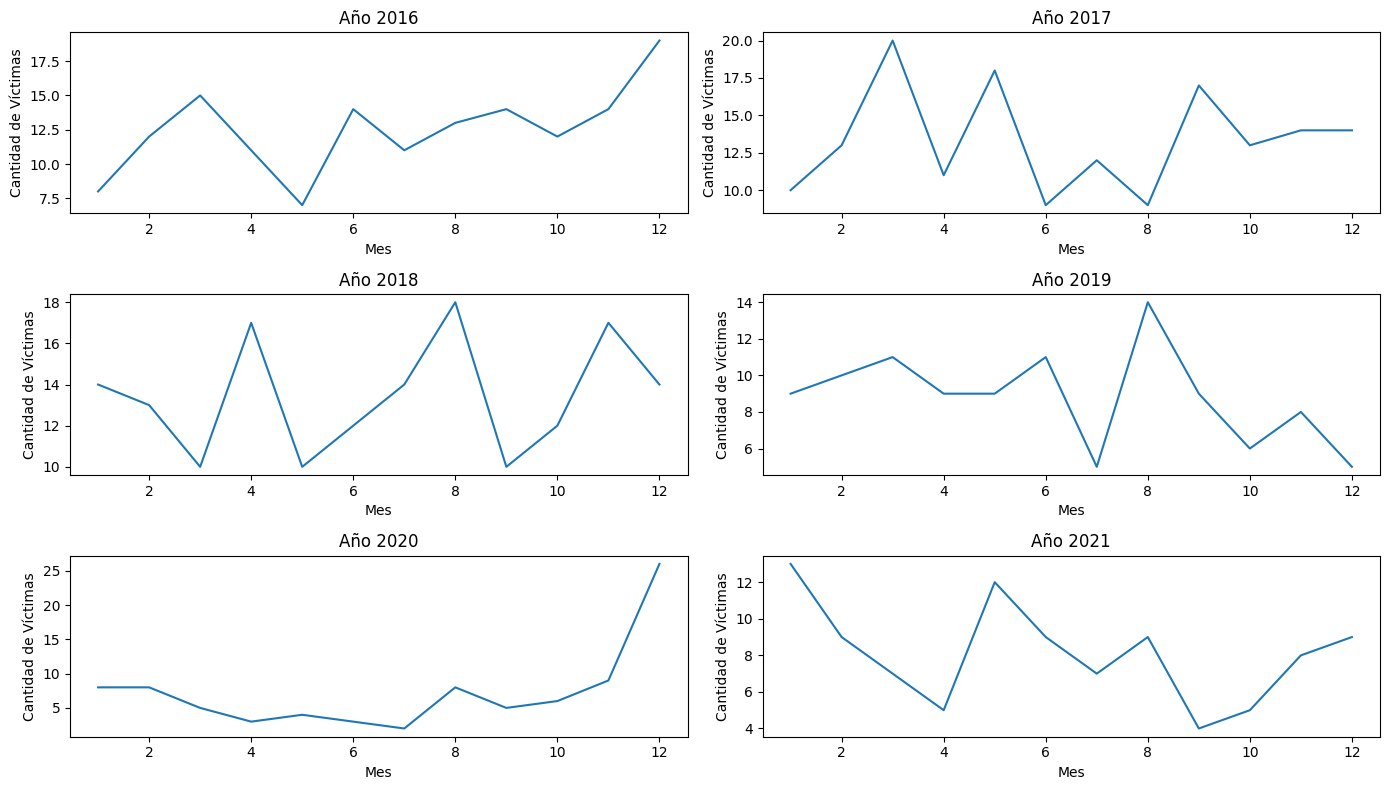

In [445]:
functions.accidentes_mensuales(df_homicidios)

Podemos observar en los grafico anteriores que no existe un patron que conlleve a la ocurrencia de los accidentes, eso nos indica que son accidentes fortuitos, lo que si podemos observar claramente, es un patron que conlleva a la disminucion de los mismos entre los meses de Noviembre del año 2019 y el mes de Octubre del año 2020 esto debido a las restricciones que tomo el Gobierno Nacional de cuarentena por consecuencia del COVID-19. 
Cuando las medidas fueron retiradas, podemos observar de nuevo un alza en la accidentalidad la cual nos demuestra que la misma no sucede por un patron establecido, sino por factores externos.

CANTIDAD DE CASOS POR MES

se hace un analisis de la cantidad de accidentes compilados en los 6 años por cada mes de estos.

El mes con menor cantidad de víctimas tiene 51 víctimas
El mes con mayor cantidad de víctimas tiene 87 víctimas


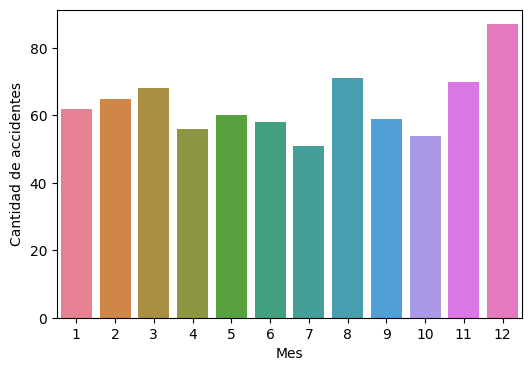

In [469]:
functions.cantidad_de_victimas_por_mes(df_homicidios)

Como podemos observar, en los ultimos 6 años podemos deducir que el mes que mas accidentalidad aporta a las cifras es el Mes de diciembre, algo que cobra mucho sentido ya que es el mes donde se realizan las fiestas de fin de año, lo cual se traduce en mas trafico del normal por la zonas que se transita, a demas que mas en este mes que en otros se mezcla la gasolina con el licor, lo cual aumenta la probabilidad que ocurra un accidente.
El mes con menos accidentalidad de los ultimos 6 años es el mes de julio.

Discriminamos la accidentalidad en Semana o Fin de semana

Hacemos un estudio para comparar la tasa de Accidentes entre semana o fin de semana

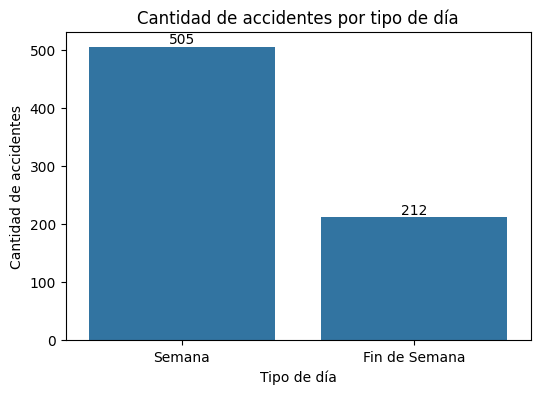

In [474]:
functions.cantidad_accidentes_semana_fin_de_semana(df_homicidios)

Con el grafico anterior podemos constatar que la mayoria de los Accidentes suceden en la semana, ya que la semana consta de 5 dias y el fin de semana solo de 2, pero si hacemos un analisis mas exaustivo, podemos verificar, que la relacion de accidetes - dia es en semana de 101 accidentes diarios mientras que los fines de semana es una relacion de 106 accidentes - dia.

VERIFICAMOS EN QUE LAPSO SUCENDEN LOS ACCIDENTES
Creamos una nueva columna para poder dividir el dia en 5 rangos diferentes dependiendo del una franja horaria de la siguiente manera:


- Mañana: de 6:00 a 10:59
- Medio día: de 11:00 a 13:59
- Tarde: de 14:00 a 18:59
- Noche: de 19:00 a 23:59
- Madrugada: de 24:00 a 05:59


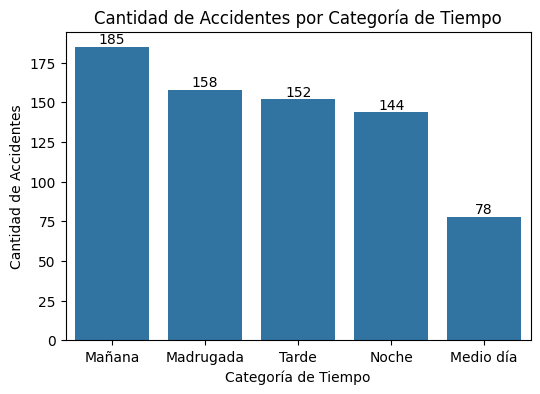

In [482]:

functions.cantidad_accidentes_por_categoria_tiempo(df_homicidios)

Podemos concluir del grafico quela mayoria de los accidentes ocurren en la franja de la mañana, cuando es e momento de desplazamiento a los lugares de trabajo, ademas tambien observamos que el segundo momomento de mayor accidentalidad es la madrugada, el cual es el momento donde se desarrolla la vida nocturna (Fiesta) de las ciudades.
El menor momento de accidentalidad es el medio dia.

Cantidad ede Victimas por Edades

Vamos a hacer un analisis de los Accidentes con respeco a las edades de los involucrados para ello tomamos los siguientes ranfos etarios

- Infantes: edades menores a 15 años.
- Jóvenes: edades entre 16 y 25 años.
- Adultos: edades entre 26 y 50 años.
- Adultos mayores: edades entre 51 y 70 años.
- Ancianos: edades mayores a 71 años.

<Axes: xlabel='Rango etario', ylabel='Cantidad de registros'>

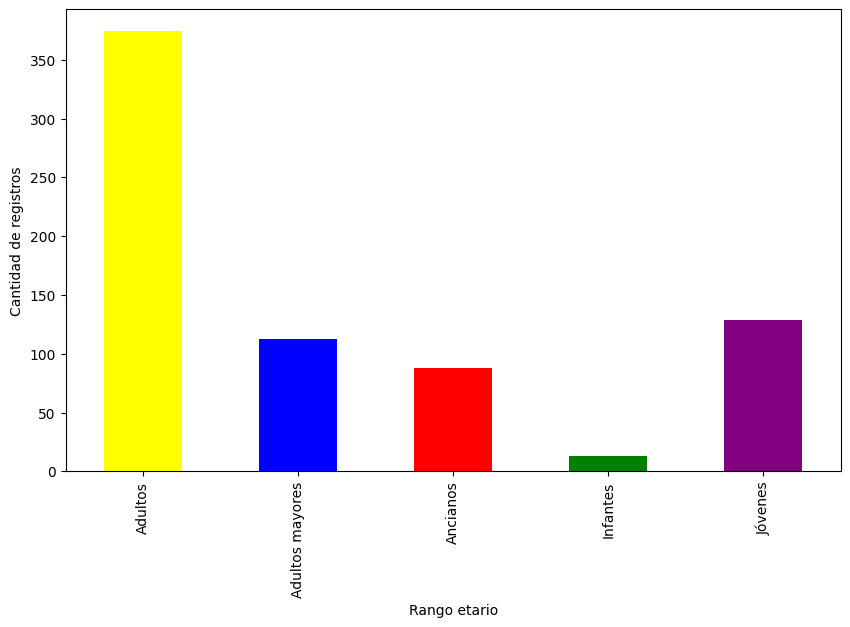

In [487]:
functions.victimas_por_rango_etario(df_homicidios)

Analizando el Grafico podemos concluir que la mayoria de los casos estan contenidos en la categoria adultos

Victimas segun su genero

Vamos a analizar la relacio que existe entre e genero, el rol de la persona, y el tipo de vechiculo que usaba la persona.

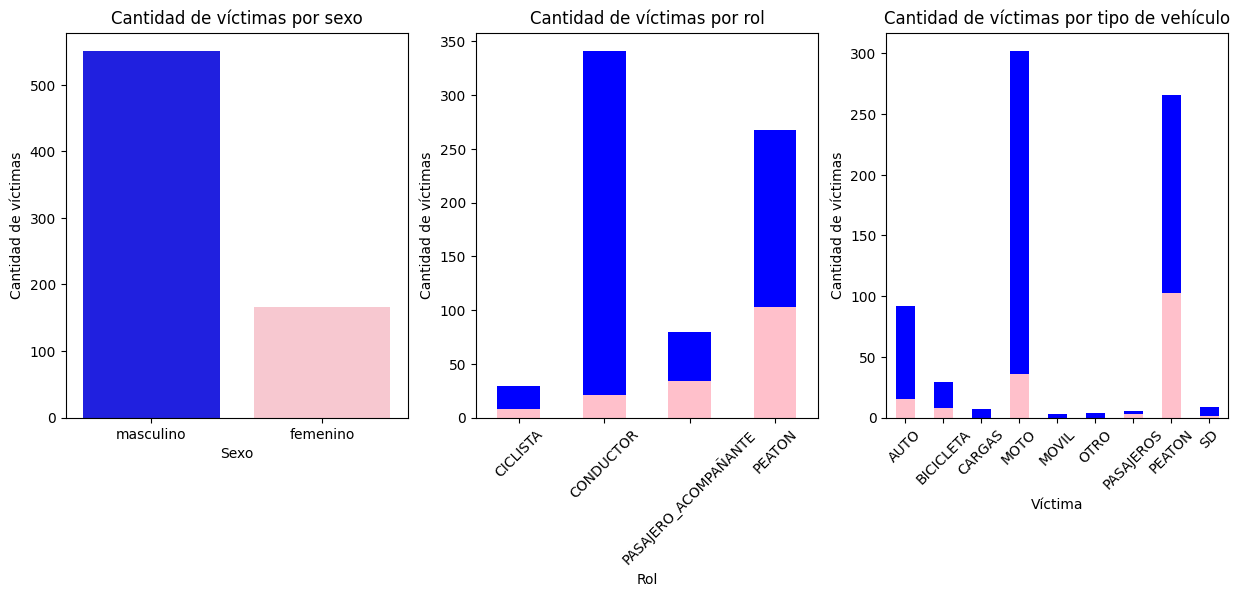

In [505]:
functions.cantidad_victimas_sexo_rol_victima(df_homicidios)

Se pude observar en los graficos que hay mas cantidad de victimas MASCULINAS que FEMENINAS, ademas notamos que la mayoria de las victimas que conducian eran hombres,el vehiculo que mas vidas costo es la moto la mayoria hombres, pero tambien notamos un aumento conciderable y mayoritario en el fallecimineto de mujeres como peatonas.

LUGAR DE ACCIDENTALIDAD SEGUN SU NOMENCLATURA

Aca podemos analizar los tipos de nomenclara urbana donde tuvieron lugar los accidentes.

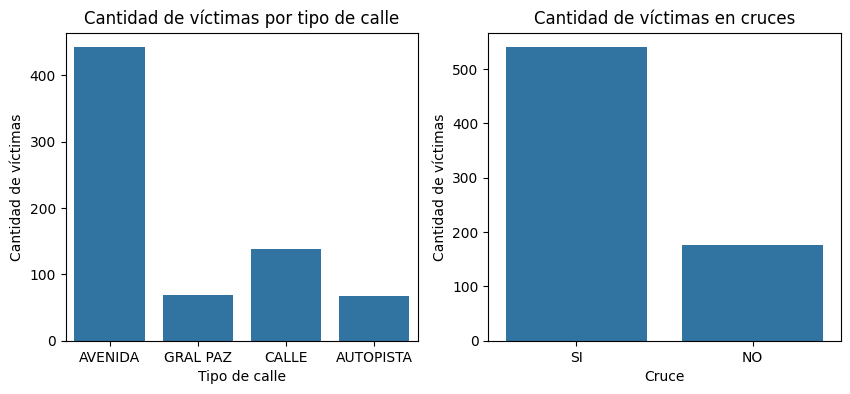

In [506]:
functions.accidentes_tipo_de_calle(df_homicidios)

Analizamos del grafico que la mayoria de los accidentes se producen en las Avenidas, ya q son lugares urbanos donde se pueden encontrar mas cantidad de actores viales, que son los que a su vez pueden ocacionar los accidentes que a la postre se convierten en homicidios viales, tambien notamos una gran tasa de accidentalidad en los cruces.

VEHICULO

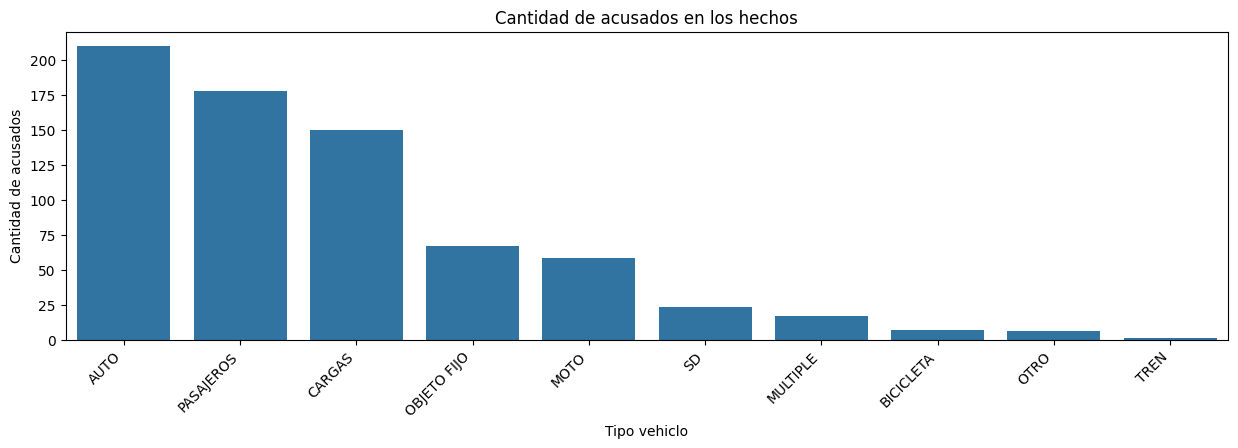

Resumen de acusados:
  Tipo vehiclo  Cantidad de acusados  Porcentaje de acusados
0         AUTO                   210                   29.29
1    PASAJEROS                   178                   24.83
2       CARGAS                   150                   20.92
3  OBJETO FIJO                    67                    9.34
4         MOTO                    58                    8.09
5           SD                    23                    3.21
6     MULTIPLE                    17                    2.37
7    BICICLETA                     7                    0.98
8         OTRO                     6                    0.84
9         TREN                     1                    0.14


In [512]:
functions.cantidad_acusados(df_homicidios)

Del grafico podemos inferir que la mayoria de los accidentes son ocacionados por autos, tambien notamos un numero elevado de victimas que hacian uso de servicio publico, ya sea que se encontraran dentro o ingresando o saliendo del vechiculo al momento del accidente.
Tambien constatamos que el medio de transporte que menos accidentes ocasiona es el Tren.

GUARDAMOS EL ARCHIVO EN UN CSV

In [513]:
df_homicidios.to_csv('datos_homicidios_final.csv', index=False, encoding='utf-8')
print('Se guardaron correctamente los datos.')

Se guardaron correctamente los datos.
